In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv(r"/home/Iris.csv")

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
iris.drop(columns = "Id", inplace = True)

In [6]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


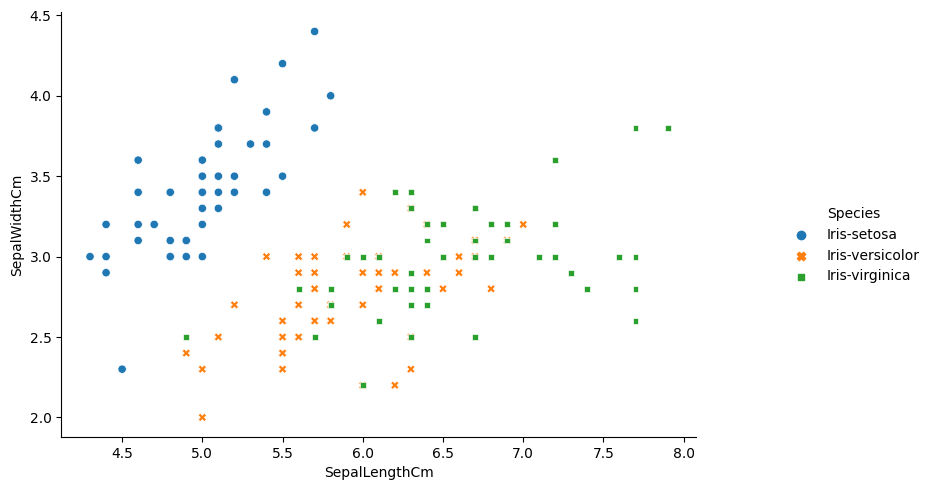

In [7]:
g = sns.relplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris, hue = 'Species', style = 'Species')
g.fig.set_size_inches(10, 5)
plt.show()

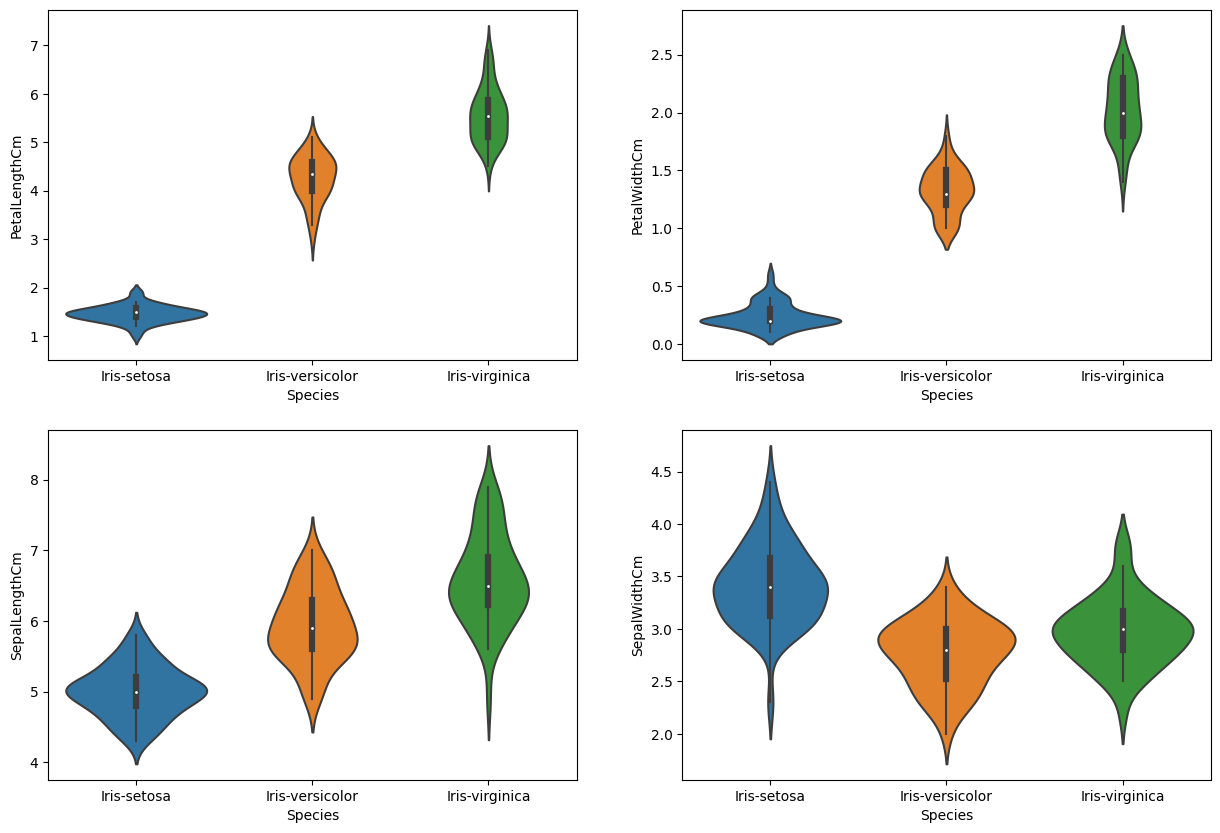

In [8]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x = 'Species',y = 'PetalLengthCm',data = iris)
plt.subplot(2, 2, 2)
sns.violinplot(x = 'Species',y = 'PetalWidthCm',data = iris)
plt.subplot(2, 2, 3)
sns.violinplot(x = 'Species',y = 'SepalLengthCm',data = iris)
plt.subplot(2, 2, 4)
sns.violinplot(x = 'Species',y = 'SepalWidthCm',data = iris)
plt.show()

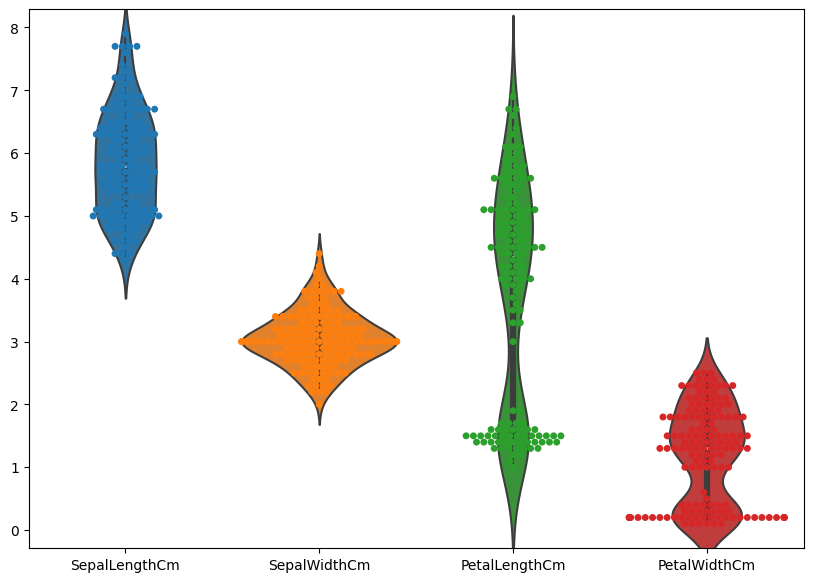

In [9]:
plt.subplots(figsize = (10, 7))
sns.violinplot(data = iris)
sns.swarmplot( data = iris)
plt.show()

<Axes: >

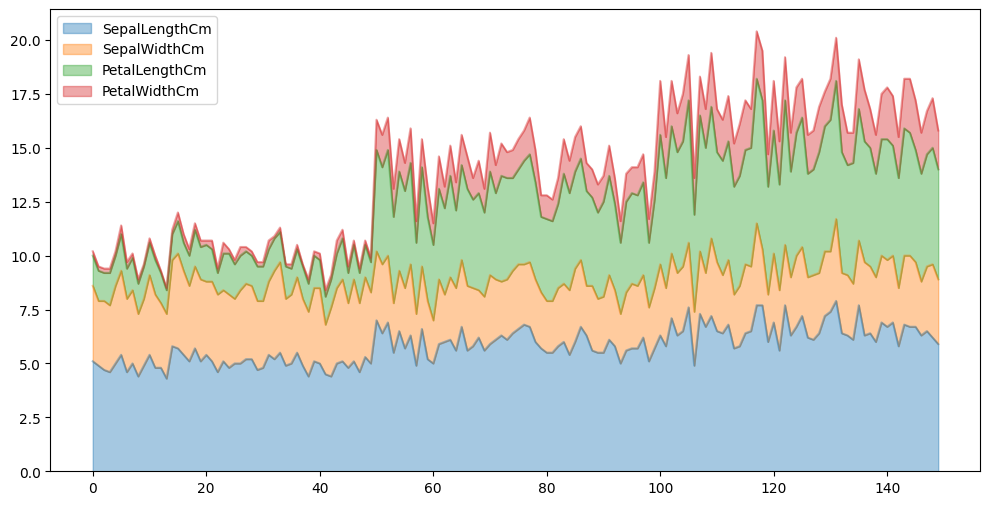

In [10]:
iris.plot.area(y = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], alpha = 0.4, figsize = (12, 6))

In [11]:
iris.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
correlations = iris.iloc[:, 0:4].corr()
correlations

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


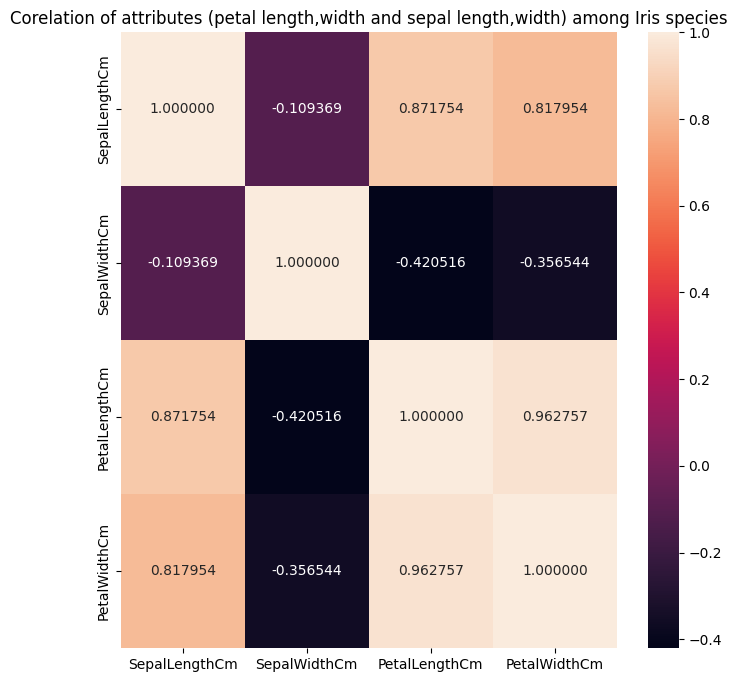

In [13]:
plt.subplots(figsize = (8, 8))
sns.heatmap(correlations, annot = True, fmt = "f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

In [14]:
x = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [19]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test) 
accuracy_nb = round(accuracy_score(y_test, y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision =precision_score(y_test, y_pred, average = 'micro')
recall =  recall_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'micro')
print('Confusion matrix for Naive Bayes\n', cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000
